**Prediksi Keselamatan Penumpang Titanic** - Nana Casmana Ade Wikarta

# **A. Identification**

### **Problem Statement**

Dataset Titanic memberikan data penumpang yang mencakup informasi seperti usia, jenis kelamin, kelas tiket, dan keberlangsungan hidup mereka. Dengan menggunakan data ini, kita membangun sebuah model machine learning yang dapat memprediksi kemungkinan keselamatan penumpang di Titanic berdasarkan informasi mereka.

### **Tujuan**

Tujuan dari analisis ini adalah untuk membangun model klasifikasi menggunakan machine learning untuk memprediksi apakah seorang penumpang Titanic akan selamat atau tidak berdasarkan informasi yang tersedia pada dataset.

### **Objektif**
1. Melakukan eksplorasi awal (EDA) terhadap dataset Titanic (train.csv) untuk memahami distribusi dan pola data.
2. Menangani nilai hilang dan mengolah fitur kategorikal, termasuk encoding dan pemilihan fitur relevan.
3. Membangun model klasifikasi menggunakan algoritma sederhana (Logistic Regression).
4. Mengevaluasi performa model menggunakan metrik: Akurasi, Confusion Matrix, Precision, Recall, dan F1-Score.
5. Memberikan interpretasi hasil evaluasi model untuk memahami potensi false positive/false negative dalam prediksi keselamatan penumpang.
6. Mendokumentasikan proses dan hasil secara sistematis dan mengunggah ke GitHub untuk keperluan review oleh tim HR.

### **Link Dataset**
https://www.kaggle.com/c/titanic/data

# **B. Set Up**

## **B.1 Import Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk modeling dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

## **B.2 Load Gdrive**

In [50]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **B.3 Load Dataset**

In [51]:
# Load dataset
file_path = '/content/drive/MyDrive/titanic/dataset/train.csv'
df = pd.read_csv(file_path)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **C. Exploratory Data Analysis**

In [52]:
# Lihat 5 baris pertama
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Langkah ini untuk melihat gambaran umum dari data dan menentukan apakah ada hal-hal yang perlu diperhatikan pada awalan.


Untuk memeriksa tipe data setiap kolom dan jumlah data yang hilang (null values), kita gunakan:

In [53]:
# Info tipe data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Data Information:**
1. **`PassengerId`** (int): ID unik untuk setiap penumpang.
2. **`Survived`** (int): Kolom target yang menunjukkan apakah penumpang selamat atau tidak. Nilai 1 berarti selamat, dan nilai 0 berarti tidak selamat. Ini adalah kolom yang akan diprediksi oleh model.
3. **`Pclass`** (int): Kelas tiket penumpang, yang menunjukkan status sosial-ekonomi penumpang:
 - 1 = Kelas pertama
 - 2 = Kelas kedua
 - 3 = Kelas ketiga

4. **`name`** (str): Nama penumpang.
5. **`sex`** (str): Jenis kelamin penumpang. Kolom ini dapat digunakan sebagai fitur kategorikal untuk model, yang harus diubah menjadi format numerik (misalnya menggunakan Label Encoding).
6. **`age`** (float): Usia penumpang.
7. **`SibSp`** (int): Jumlah saudara atau pasangan (siblings/spouses) yang ikut bersama penumpang di kapal Titanic.
8. **`parch`** (int): Jumlah orang tua atau anak yang ikut bersama penumpang di kapal Titanic.
9. **`ticket`** (str): Nomor tiket penumpang.
10. **`fare`** (float): Harga tiket yang dibayar oleh penumpang. Kolom ini merupakan fitur numerik yang relevan dengan status sosial-ekonomi penumpang.
11. **`cabin`** (string): Nomor kabin penumpang.
12. **`embarked`** (str): Pelabuhan keberangkatan penumpang:
 - C = Cherbourg
 - Q = Queenstown
 - S = Southampton

In [54]:
# Cek baris dan kolom
nRow, nCol = df.shape
print(f'ada {nRow} baris and {nCol} kolom')

# Cek Missing Values
print('Missing values: ')
print(df.isnull().sum())
print("\n")

# Check duplicated data
duplikat = df.duplicated().sum()
print(f'Jumlah data duplikat sebanyak {duplikat} data ')

ada 891 baris and 12 kolom
Missing values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Jumlah data duplikat sebanyak 0 data 


In [55]:
# Statistik deskriptif
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


 Statistik ini memberi gambaran tentang distribusi nilai di setiap kolom numerik (seperti Age, Fare), yang membantu kita memahami data lebih dalam.

## **C.1 Visualisasi distribusi umur**

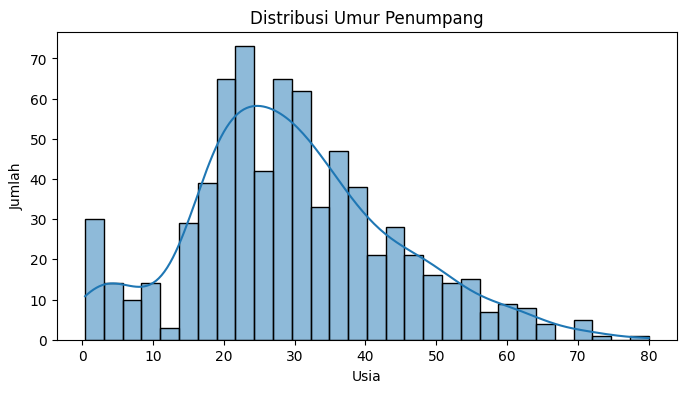

In [56]:
# Distribusi umur
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Umur Penumpang')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

Visualisasi ini membantu kita memahami distribusi usia penumpang di Titanic. Penumpang dengan usia 20-an hingga 40-an tampak paling banyak, sementara lebih sedikit penumpang yang lebih muda atau lebih tua.

## **C.2 Jumlah penumpang berdasarkan jenis kelamin**

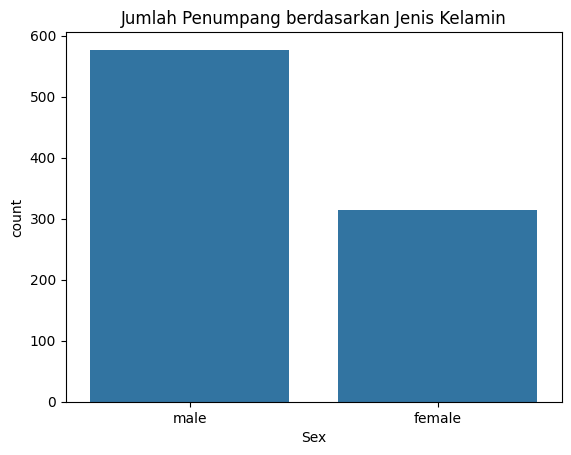

Sex
male      577
female    314
Name: count, dtype: int64


In [57]:
# Jumlah penumpang berdasarkan jenkel
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.show()

# Display output
gender_count = df['Sex'].value_counts()
print(gender_count)

Terdapat 577 penumpang laki-laki dan 314 penumpang perempuan, yang menunjukkan bahwa lebih banyak penumpang laki-laki yang berada di kapal Titanic

## **C.3 Jumlah penumpang berdasarkan kelas tiket**

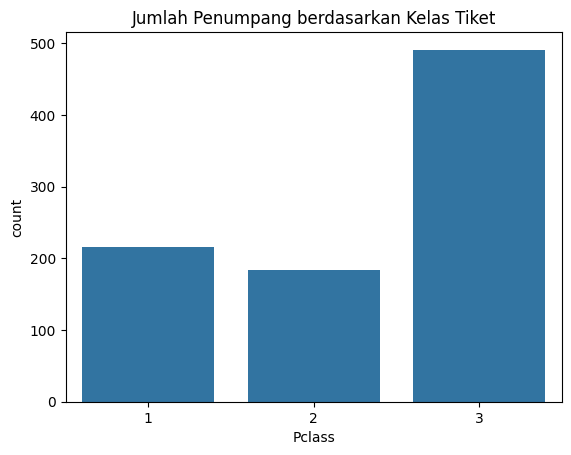

In [58]:
# Jumlah penumpang berdasarkan kelas tiket
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang berdasarkan Kelas Tiket')
plt.show()

Kelas 1 (Pclass = 1): Memiliki jumlah penumpang yang paling sedikit dibandingkan dengan kelas lainnya, namun jumlahnya tetap signifikan.

Kelas 2 (Pclass = 2): Jumlah penumpang di kelas 2 sedikit lebih banyak dibandingkan dengan kelas 1, namun lebih sedikit dibandingkan kelas 3.

Kelas 3 (Pclass = 3): Kelas ini memiliki jumlah penumpang yang terbanyak, hampir dua kali lipat jumlah penumpang di kelas 1 dan 2.

## **C.4 Heatmap Korelasi**

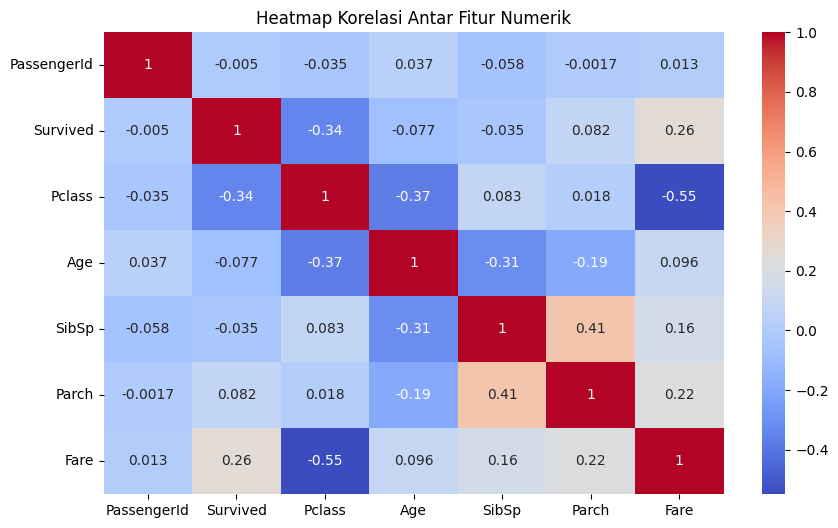

In [59]:
# Korelasi antara Fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

Faktor utama yang mempengaruhi kelangsungan hidup adalah Kelas tiket (Pclass) dan harga tiket (Fare). Penumpang yang berada di kelas 3 (kelas ekonomi) memiliki kemungkinan lebih rendah untuk selamat, sedangkan penumpang di kelas 1 (kelas atas) lebih mungkin selamat. Lalu, fare dan survived memiliki korelasi positif moderat (0.26). Penumpang yang membayar tiket lebih mahal (misalnya, kelas atas) memiliki kemungkinan lebih tinggi untuk selamat.
Kemudian, umur penumpang sedikit mempengaruhi kelangsungan hidup mereka, meskipun hubungan ini tidak sangat kuat.

# **D. Data Preprocessing**

Setelah mengetahui struktur dan visualisasi data, langkah selanjutnya adalah mempersiapkan data agar bisa digunakan oleh model.

## **D.1 Handle Missing Values**

In [60]:
# Isi missing value kolom Age dengan median (lebih stabil dari mean jika ada outlier)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Kolom Embarked diisi dengan modus (nilai terbanyak)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Kolom Cabin dihapus karena banyak missing value
df.drop(columns=['Cabin'], inplace=True)


Ada beberapa kolom dengan nilai hilang:

*   Kolom `Age` yang memiliki nilai hilang, kita akan mengisi nilai-nilai tersebut dengan median, karena usia bersifat numerik dan median lebih baik untuk data yang terdistribusi tidak merata.
*   Kolom `Embarked` yang memiliki nilai hilang, kita akan mengisinya dengan modus (nilai paling sering) karena ini adalah data kategorikal dan yang hilang tidak terlalu banyak.
*   `Cabin` dihapus karena data yang hilang sangat banyak dan jika diisi dapat berpotensi menghasilkan noise.






## **D.2 Encoding**

In [61]:
# Label Encoding untuk kolom Sex
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0

# One-Hot Encoding untuk kolom Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Hindari multikolinearitas


Untuk kolom Sex, kita bisa menggunakan Label Encoding karena hanya ada dua kategori (male dan female). Kemudian, untuk Embarked, kita menggunakan One-Hot Encoding agar setiap kategori memiliki kolom terpisah alasannya karena jika nilai pada satu kolom adalah 1, dua kolom lainnya harus bernilai 0. Hal ini menciptakan multikolinieritas yang bisa merugikan model (terutama pada model linear seperti regresi logistik), karena kolom-kolom tersebut menyimpan informasi yang sangat mirip.

Untuk menghindari masalah multikolinieritas ini, kita dapat menghapus satu kolom dari hasil One-Hot Encoding, yang sering disebut dengan teknik dummy variable trap. Menghapus satu kolom tidak akan mengurangi informasi yang tersedia, karena kolom yang tersisa sudah cukup untuk merepresentasikan seluruh kategori.

## **D.3 Feature Selection**

In [62]:
# Hapus kolom yang tidak relevan
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Cek kolom yang tersisa
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


Atribut yang dihapus tidak terlalu relevan dalam penelitian karena `PassengerId` hanya ID, tidak mengandung informasi prediktif. Lalu, `name` berisi string panjang dan sulit digunakan langsung, dan `ticket` datanya tidak terlalu jelas maknanya.

# **E. Data Splitting**

In [63]:
# Pisahkan fitur dan target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kita pisahkan antara fitur (X) dan label yang mau diprediksi (y = Survived).
Terus bagi datanya 80% buat training, 20% buat testing. Pembagian data menjadi training dan testing set penting untuk memeriksa apakah model dapat bekerja dengan baik pada data yang belum dilihat sebelumnya.

# **F. Modelling**

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

 Logistic Regression adalah model klasifikasi yang sederhana dan cukup efektif untuk masalah ini. Dengan menggunakan max_iter=1000, kita memberikan cukup waktu bagi model untuk berkonvergensi.

# **G. Evaluation**

Kita menggunakan beberapa metrik untuk mengevaluasi performa model, seperti:

- **Akurasi**: Seberapa banyak prediksi model yang benar.

- **Matriks Konfusi**: Memperlihatkan jumlah prediksi benar dan salah dalam kategori positif dan negatif.

- **Precision, Recall, F1-Score**: Mengukur seberapa baik model dalam mengklasifikasikan hasil yang positif (penumpang yang selamat).

Akurasi: 0.81


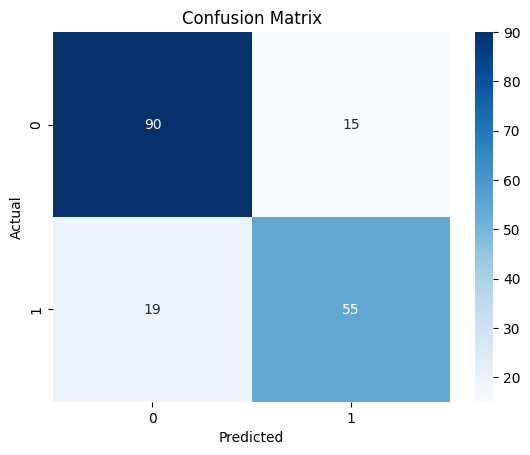

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [65]:
y_pred = model.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Akurasi yang dihasilkan sebesar (0.81) = 81%.

dan berikut adalah penjelasan Confusion Matrix:

- `True Negative (TN) = 90`: Ada 90 penumpang yang diprediksi tidak selamat dan memang tidak selamat. Ini adalah jumlah prediksi yang benar untuk kategori "tidak selamat" (0).

- `False Positive (FP) = 15`: Ada 15 penumpang yang diprediksi tidak selamat, tetapi sebenarnya mereka selamat. Ini adalah kesalahan prediksi positif.

- `False Negative (FN) = 19`: Ada 19 penumpang yang diprediksi selamat, tetapi sebenarnya mereka tidak selamat. Ini adalah kesalahan prediksi negatif.

- `True Positive (TP) = 55`: Ada 55 penumpang yang diprediksi selamat dan memang selamat. Ini adalah jumlah prediksi yang benar untuk kategori "selamat" (1).

Evaluasi ini memberikan gambaran yang lebih lengkap tentang kinerja model dan membantu kita memahami kekuatan dan kelemahan model.

In [66]:
# Melakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(model, X, y, cv=5)

# Display output
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.7877095  0.78651685 0.78651685 0.76966292 0.8258427 ]
Average CV score: 0.7912497646098802


Skor di antara fold cukup konsisten, dengan rentang antara 0.7697 dan 0.8258. Walaupun ada sedikit penurunan pada fold ke-4 (0.7697), secara keseluruhan performa model cukup stabil. Ini menunjukkan bahwa model tidak terlalu sensitif terhadap perubahan data pelatihan, dan dapat diandalkan di berbagai subset data.

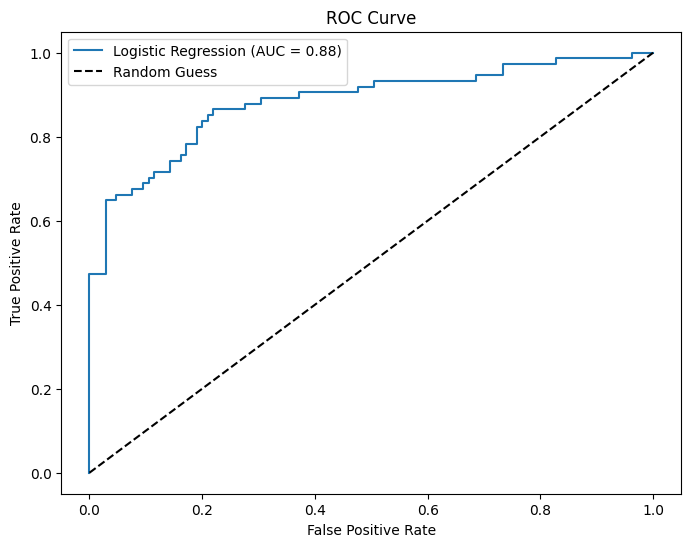

In [67]:
y_probs = model.predict_proba(X_test)[:, 1]  # Prediksi probabilitas untuk kelas 1 (selamat
fpr, tpr, thresholds = roc_curve(y_test, y_probs) # Ngitung ROC curve nya
roc_auc = auc(fpr, tpr) # Hitung AUC

# Display result
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ROC Curve (Receiver Operating Characteristic Curve) adalah grafik yang digunakan untuk menilai kinerja model klasifikasi, terutama untuk masalah dengan kelas tidak seimbang.

Interpretasi hasil:
AUC = 0.88: Area di bawah ROC Curve adalah 0.88, yang menunjukkan bahwa model Logistic Regression memiliki kemampuan yang sangat baik untuk membedakan antara penumpang yang selamat dan yang tidak selamat. Nilai AUC antara 0.8 hingga 1.0 dianggap sangat baik, menunjukkan bahwa model ini cukup kuat dalam membedakan kedua kelas.

Model ini memiliki performansi yang jauh lebih baik daripada tebakan acak, yang berarti model ini efektif dalam memprediksi keselamatan penumpang Titanic.

## **G.1 Testing Model**

In [68]:
def test_passenger(pclass, sex, age, sibsp, parch, fare, embarked_q, embarked_s):
    sample = pd.DataFrame([{
        'Pclass': pclass,
        'Sex': sex,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }])
    pred = model.predict(sample)[0]
    return "Survived" if pred == 1 else "Not Survived"

# Contoh
print(test_passenger(1, 0, 28, 0, 0, 100, 0, 1))  # Wanita kelas 1, dari Southampton


Survived


# **H. Penjelasan dan Kesimpulan**

**1. Eksplorasi Data (Exploratory Data Analysis - EDA)**

- Tujuan: Memahami struktur data sebelum melakukan pemrosesan dan pelatihan model.

Pengecekan Data Awal:

- Dengan menggunakan `df.head()` dan `df.info()`, kita bisa melihat beberapa baris pertama dan tipe data masing-masing kolom untuk memastikan semuanya dimuat dengan benar dan sekaligus memahami data tersebut. Ini juga menunjukkan adanya nilai yang hilang pada kolom-kolom tertentu, seperti `Age` `Embarked`, dan `Cabin`.

Statistik Deskriptif:

- Fungsi `df.describe()` memberikan ringkasan statistik numerik yang memberikan gambaran umum mengenai distribusi data seperti rata-rata, median, dan rentang nilai (min-max).

Visualisasi Distribusi:

- Distribusi Umur menggunakan histogram membantu kita melihat sebaran usia penumpang Titanic. Ada puncak di sekitar usia 20-40 tahun, menunjukkan bahwa kebanyakan penumpang berada di rentang usia tersebut.

- Jumlah Penumpang Berdasarkan Jenis Kelamin dan Kelas Tiket memberikan gambaran distribusi kategori. Lebih banyak penumpang laki-laki dibandingkan perempuan dan jumlah penumpang kelas 3 jauh lebih banyak daripada kelas 1 dan 2.

---

**2. Pra-pemrosesan Data (Data Preprocessing)**

- Tujuan: Memastikan data siap digunakan oleh model.

Menangani Nilai Hilang:

- Untuk kolom `Age`, nilai hilang diisi dengan median karena distribusi usia yang tidak normal atau merata.

- Kolom Embarked diisi dengan modus (nilai terbanyak), karena ini adalah data kategorikal dengan hanya beberapa nilai hilang.

Mengonversi Kategorikal menjadi Numerik:

- Kolom Sex diubah menjadi format numerik menggunakan Label Encoding (male = 0, female = 1).

- Kolom Embarked diubah menjadi format numerik menggunakan One-Hot Encoding dengan menghapus kolom pertama untuk menghindari masalah multikolinieritas.

Pemilihan Fitur:

- Kolom-kolom seperti PassengerId, Name, dan Ticket tidak relevan untuk prediksi dan dihapus.


---

**3. Persiapan Data untuk Model**

Tujuan: Membagi data menjadi fitur dan target, serta membaginya menjadi set pelatihan dan pengujian.

Fitur dan Target:

- Kolom Survived digunakan sebagai target variabel (y) yang ingin diprediksi, sedangkan fitur lainnya seperti Age, Sex, Pclass, dan lainnya digunakan sebagai fitur (X).

Pembagian Data:

- Data dibagi menjadi set pelatihan dan pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Ini bertujuan untuk mengevaluasi model pada data yang belum pernah dilihat sebelumnya.


---


**4. Pelatihan Model**

Tujuan: Melatih model menggunakan data pelatihan untuk memprediksi kelas (penumpang selamat atau tidak selamat).

Model yang Digunakan:

- Model Logistic Regression digunakan untuk prediksi klasifikasi biner (selamat atau tidak selamat) karena LR sudah cukup baik dan sederhana dalam menangani project ini.

Evaluasi Model:

- Model dilatih menggunakan data pelatihan dan dilakukan prediksi pada data pengujian.


---

**5. Evaluasi Model**

Tujuan: Menilai seberapa baik model melakukan prediksi dengan menggun
akan berbagai metrik evaluasi.

- Evaluasi Model: Berdasarkan confusion matrix dan classification report, model ini cukup baik dalam memprediksi kelas "tidak selamat", namun ada ruang untuk perbaikan pada prediksi kelas "selamat" dengan meningkatkan recall.

- K-Fold Cross-Validation: Dengan rata-rata skor 0.7912, model menunjukkan kinerja yang stabil di seluruh dataset, dan ini mengurangi risiko overfitting.

- ROC Curve dan AUC: Model Logistic Regression memiliki AUC 0.88, menunjukkan kemampuan model yang sangat baik dalam membedakan antara penumpang yang selamat dan yang tidak selamat. ROC Curve juga jauh dari garis diagonal (random guess), menunjukkan performa model yang sangat baik.

K-Fold Cross validation dan ROC Curve dan AUC digunakan sebagai validasi bahwa akurasi model dalam memprediksi memang benar - benar baik. Dengan menggabungkan keempat teknik ini, kita bisa mendapatkan evaluasi model yang lebih komprehensif dan dapat dipercaya.